# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.   
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import dataset
wholesale_data = pd.read_csv('Wholesale_Data.csv')

# Data Cleaning/EDA

In [5]:
# Preview dataset
wholesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
# View Shape
wholesale_data.shape

(440, 8)

Column Descriptions taken from Kaggle:

- Channel: Hotel/Restaurant/Cafe or Retail 
- Region: Other
- Fresh: Annual spending on fresh products
- Milk: Annual spending on milk products
- Grocery: Annual spending on grocery products
- Frozen: Annual spending on frozen products
- Detergents_Paper: Annual spending on detergents and paper products
- Delicassen: Annual spending on Delicassen products

In [7]:
# information of dataset
wholesale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Dataset contains on intergers

In [8]:
# Look for duplicated values
wholesale_data.duplicated().sum()

0

In [9]:
# Look for null values
wholesale_data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

No duplicate or null values within the dataset. Let's look at the descriptive statistics

In [10]:
# Descriptive statistics
wholesale_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Findings:
- There seems to be a large spread of data within different categories. 
- May be outliers present as the max for columns such as Fresh, Milk, Grocery, Frozen, Detergents_Paper and Delicassen exceed the 3rd percentile.  

Look at histograms to see distributions.

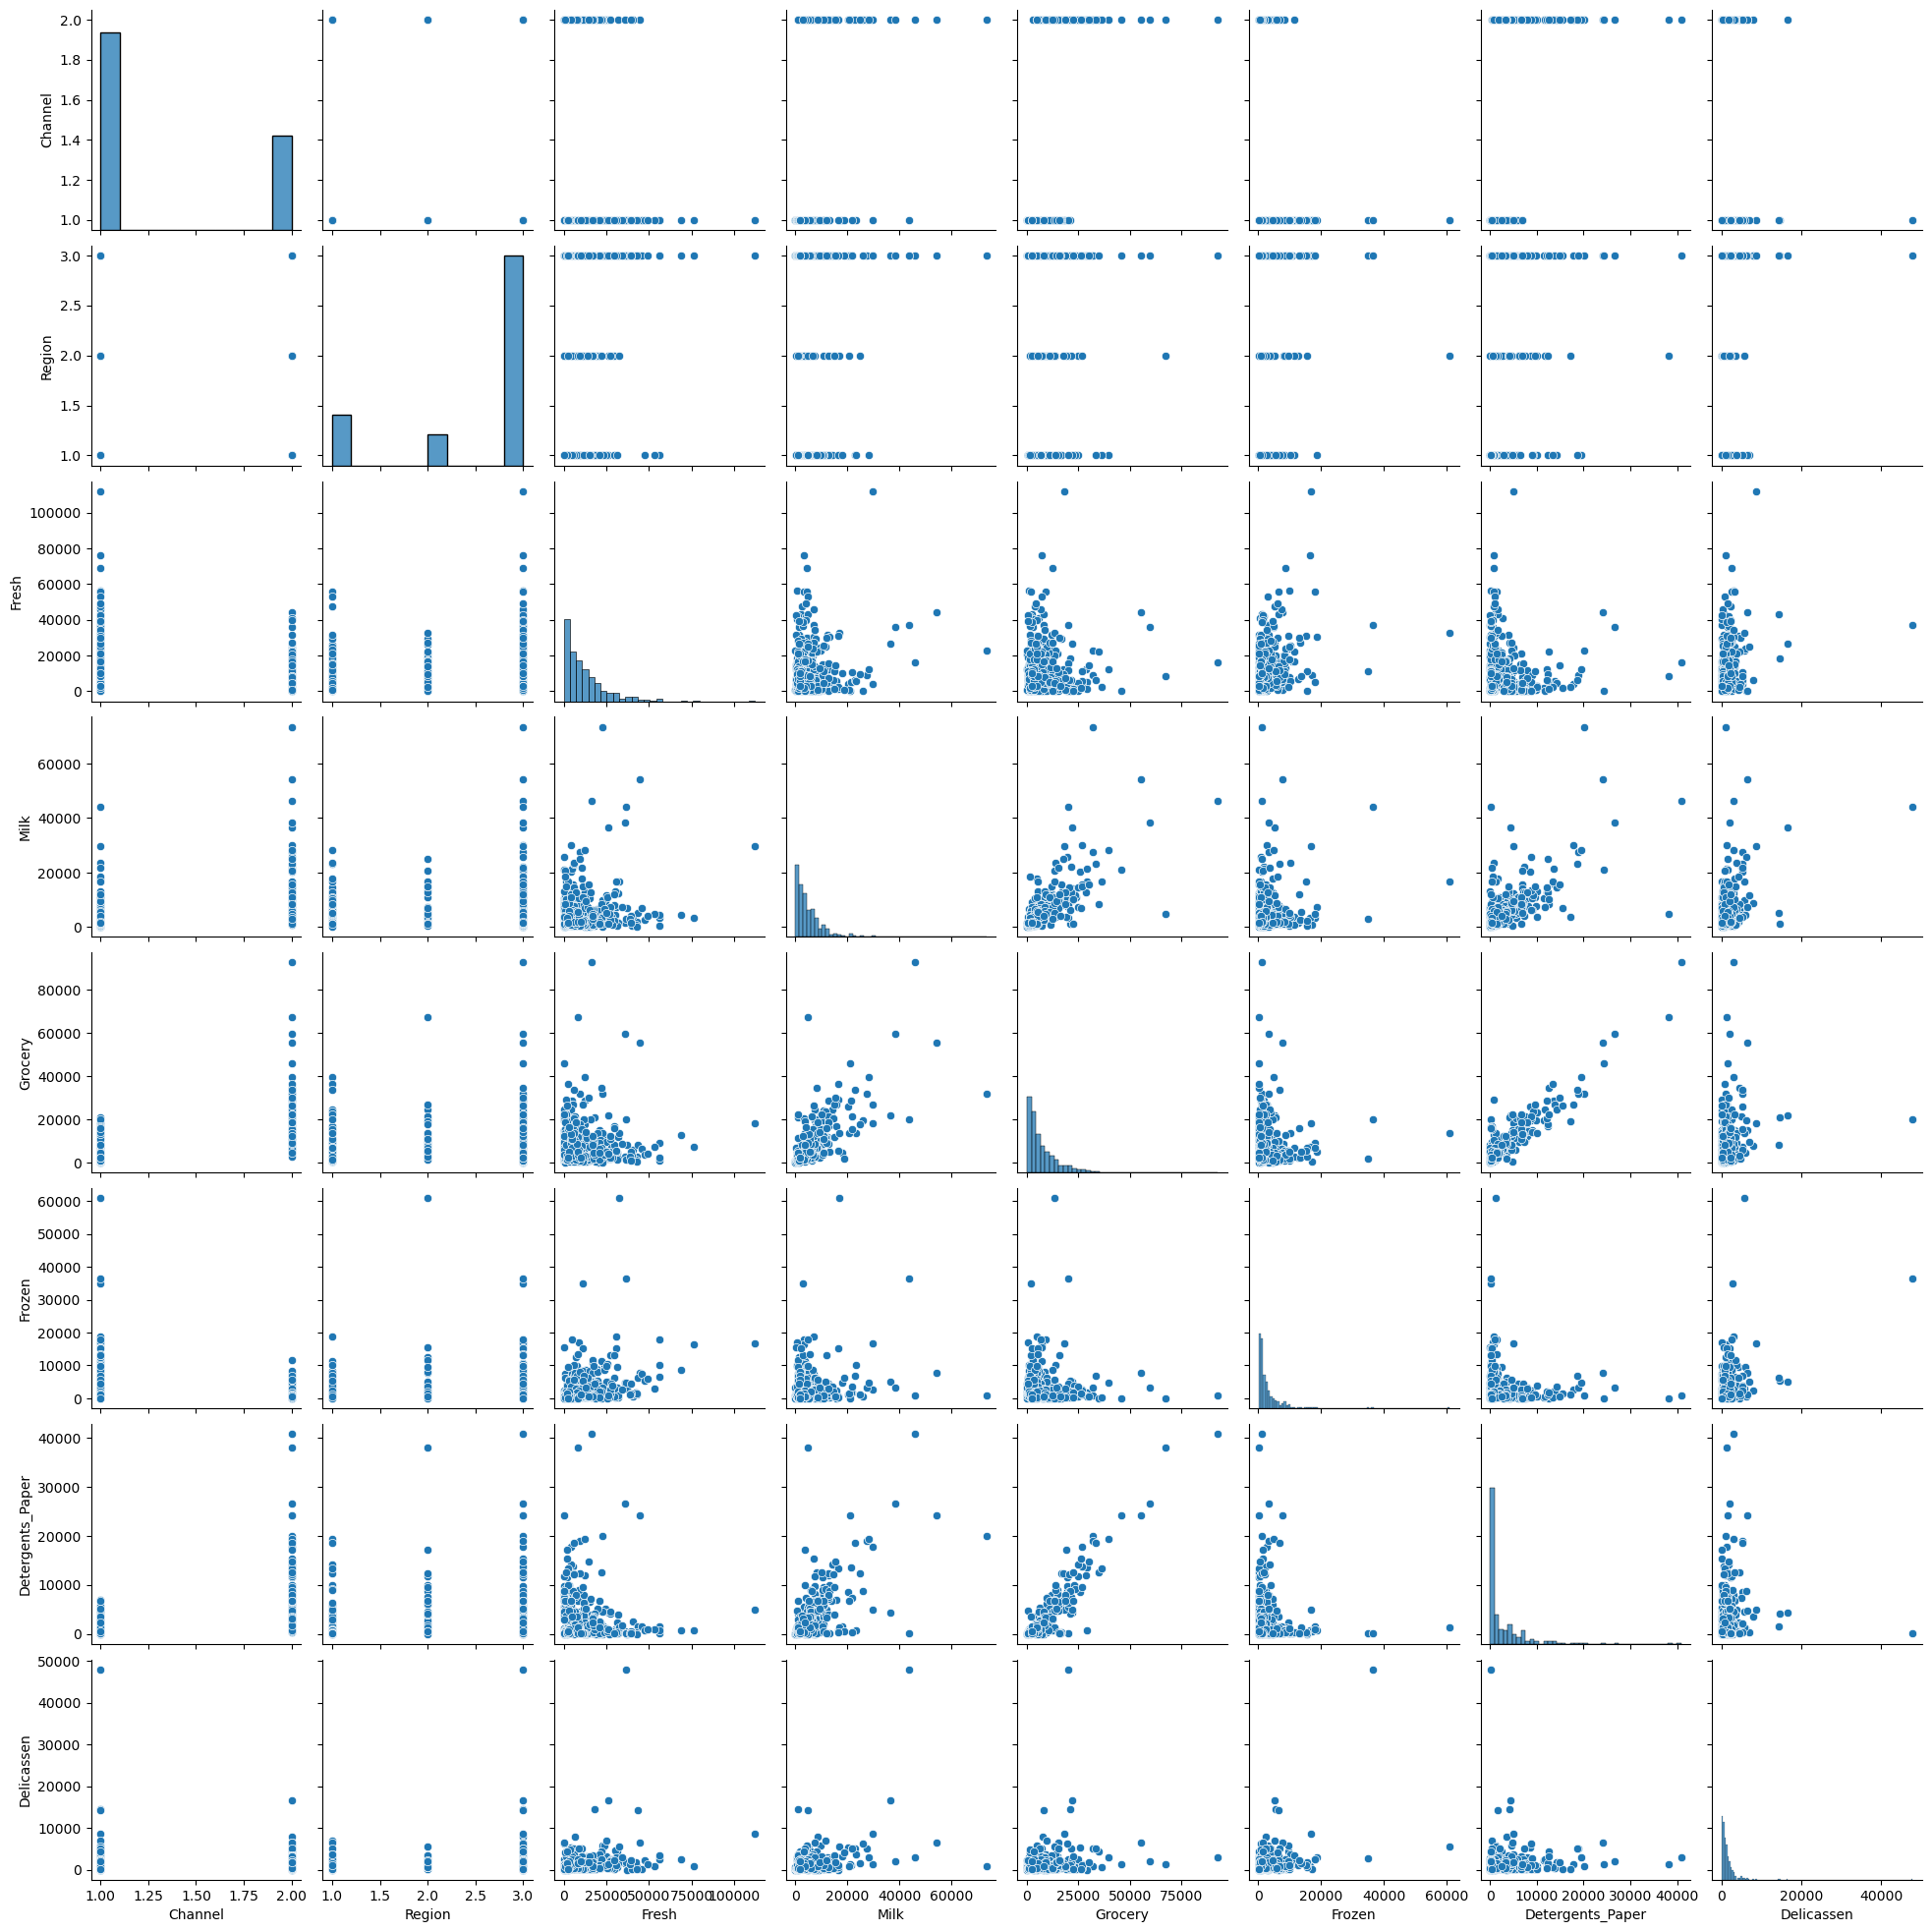

In [11]:
# Visualize all variables and relationship to each other.
print(sns.pairplot(wholesale_data))

### Pairplot Findings:

- Histograms of columns Fresh, Milk, Grocery, Frozen, Detergent_Paper, and Delicassen are left tailed.
- From the scatter plot, there seems to be a linear relationship between Grocery and Detergent_Paper

Let's isolate the histograms and look more closely

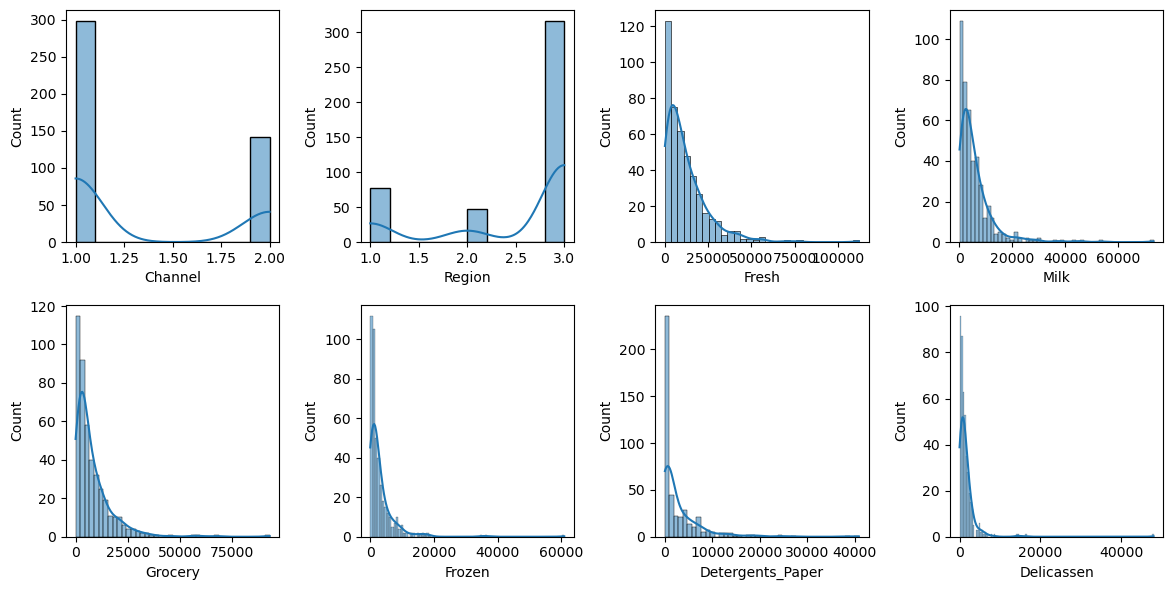

In [12]:
# Histogram distribution of whole dataset
plt.figure(figsize=(12, 6))
for i, column in enumerate(wholesale_data.columns[:]):
    plt.subplot(2, 4, i + 1)
    sns.histplot(wholesale_data[column], kde=True)
    plt.title = f"Distribution of {column}"
plt.tight_layout()
plt.show()

### Histogram Findings
- As seen previously from the pairplots, the distributions for the following columns are heavily left-tailed with a large amount of data around 0. The plots are also unimodal with a heavy skew to the right. 
    - Left-tailed columns: Fresh, Milk, Grocery, Frozen, Detergents_Paper
- The majority of the dataset is from Region 3.
- In the Channel column, the count for Channel 1 exceeds Channel 2. 

In [13]:
# Many columns have values around 0. 
# Isolate the columns where annual spending is 0. 
def find_zeros(df, x):
    df = df.loc[df[x] == 0]
    return df

In [14]:
# Use function to find zeros in coluns
find_zeros(wholesale_data, 'Fresh')
find_zeros(wholesale_data, 'Milk')
find_zeros(wholesale_data, 'Grocery')
find_zeros(wholesale_data, 'Frozen')
find_zeros(wholesale_data, 'Detergents_Paper')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


No columns were the value is 0. Let's look at the boxplots to see if there are outliers.

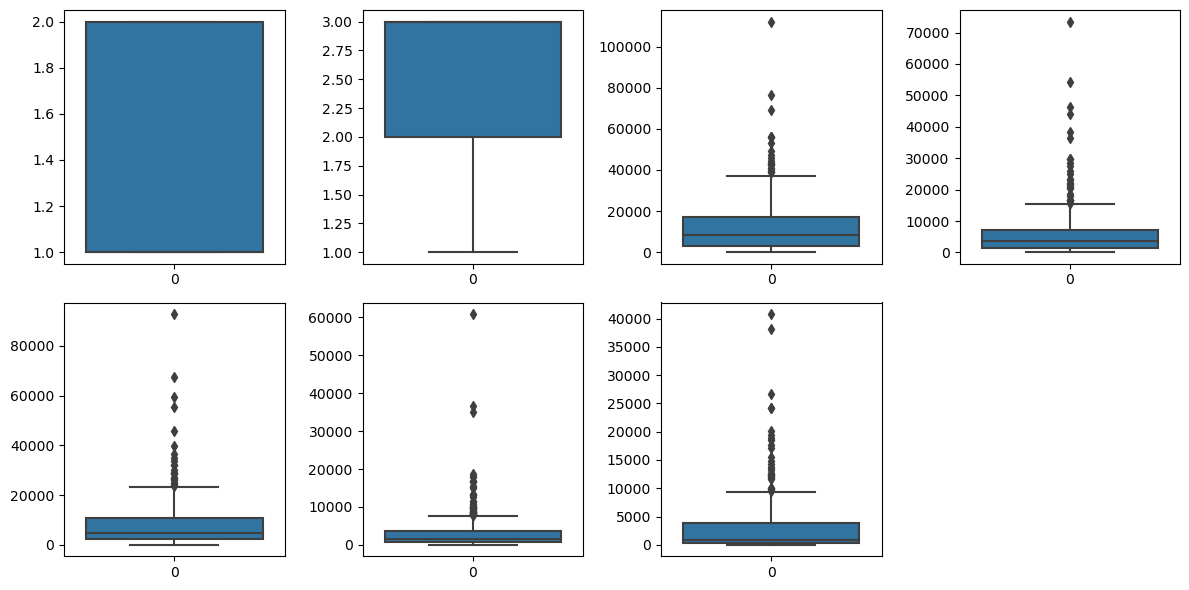

In [15]:
# View Boxplots for Outlier Analysis
plt.figure(figsize=(12, 6))
for i, column in enumerate(wholesale_data.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(wholesale_data[column])
    plt.title = f"Distribution of {column}"
plt.tight_layout()
plt.show()

### Boxplot findings:
- Looks like there are outliers present in the following columns:
    - Columns = Fresh, Milk, Grocery, Frozen, Detergents_Paper
- Isolate each column and look at rows containing outliers

<Axes: >

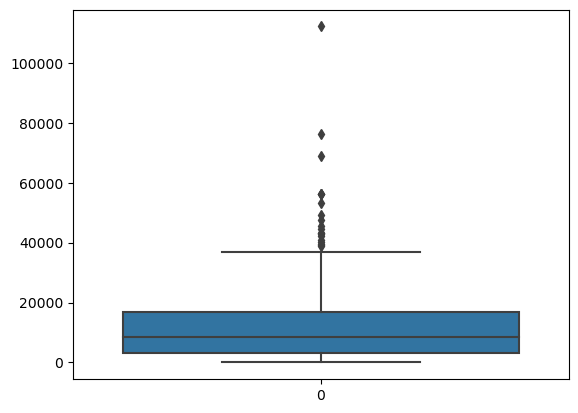

In [16]:
# Fresh Column 
sns.boxplot(wholesale_data['Fresh'])

In [17]:
# Isolate extreme outlier > 100000
wholesale_data.loc[wholesale_data['Fresh']>100000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
181,1,3,112151,29627,18148,16745,4948,8550


In [18]:
# Median imputation
wholesale_data['Fresh'] = np.where(wholesale_data['Fresh']>100000, wholesale_data['Fresh'].median(), wholesale_data['Fresh'])

<Axes: >

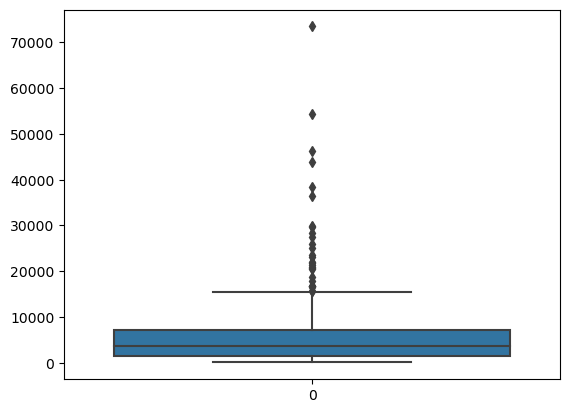

In [19]:
# Milk Column 
sns.boxplot(wholesale_data['Milk'])

In [20]:
# Isolate extreme outlier > 70000
wholesale_data.loc[wholesale_data['Milk']> 70000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,2,3,22925.0,73498,32114,987,20070,903


In [21]:
# Median Imputation
wholesale_data['Milk'] = np.where(wholesale_data['Milk']>70000, wholesale_data['Milk'].median(), wholesale_data['Milk'])

<Axes: >

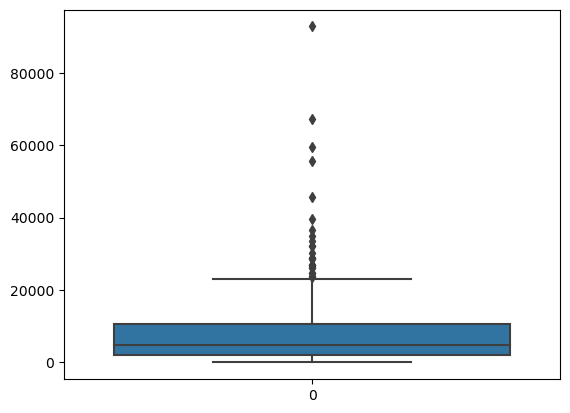

In [22]:
# Grocery Column 
sns.boxplot(wholesale_data['Grocery'])

In [23]:
# Isolate extreme outlier >80000
wholesale_data.loc[wholesale_data['Grocery']>80000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
85,2,3,16117.0,46197.0,92780,1026,40827,2944


In [24]:
# Median Imputation
wholesale_data['Grocery'] = np.where(wholesale_data['Grocery']>80000, wholesale_data['Grocery'].median(), wholesale_data['Grocery'])

<Axes: >

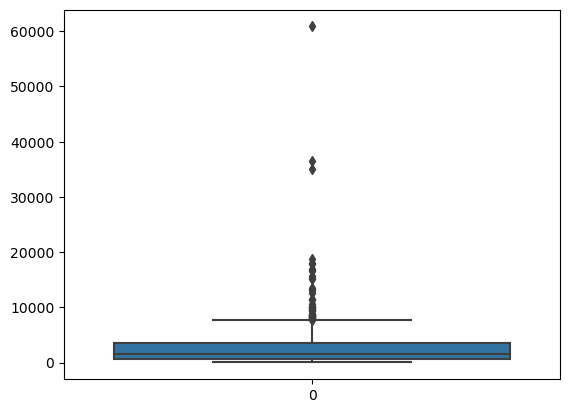

In [25]:
# Frozen Column
sns.boxplot(wholesale_data['Frozen'])

In [26]:
# Isolate extreme outlier > 30000
wholesale_data.loc[wholesale_data['Frozen'] > 30000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
93,1,3,11314.0,3090.0,2062.0,35009,71,2698
183,1,3,36847.0,43950.0,20170.0,36534,239,47943
325,1,2,32717.0,16784.0,13626.0,60869,1272,5609


In [27]:
# Median Imputation
wholesale_data['Frozen'] = np.where(wholesale_data['Frozen']>30000, wholesale_data['Frozen'].median(), wholesale_data['Frozen'])

<Axes: >

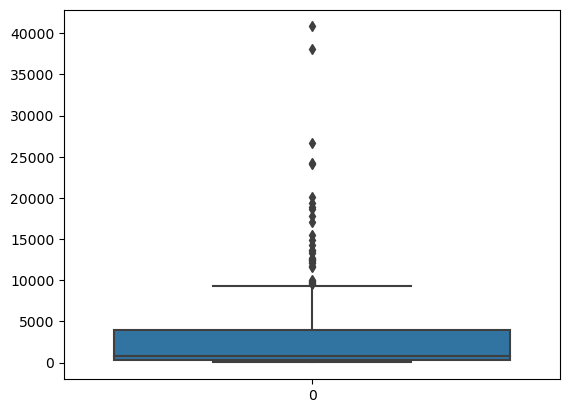

In [28]:
# Detergents_Paper Column
sns.boxplot(wholesale_data['Detergents_Paper'])

In [29]:
# Isolate extreme outliers >30000
wholesale_data.loc[wholesale_data['Detergents_Paper']>30000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
85,2,3,16117.0,46197.0,4755.5,1026.0,40827,2944
333,2,2,8565.0,4980.0,67298.0,131.0,38102,1215


In [30]:
# Median Imputation

wholesale_data['Detergents_Paper'] = np.where(wholesale_data['Detergents_Paper']>30000, wholesale_data['Detergents_Paper'].median(), wholesale_data['Detergents_Paper'])

<Axes: >

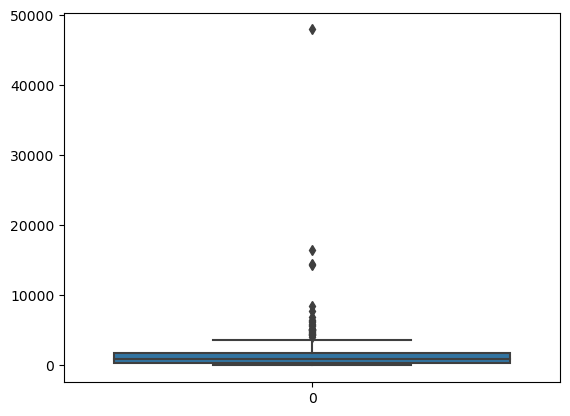

In [31]:
# Delicassen Column
sns.boxplot(wholesale_data['Delicassen'])

In [32]:
# Isolate extreme outlier > 40000
wholesale_data.loc[wholesale_data['Delicassen']>40000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
183,1,3,36847.0,43950.0,20170.0,1526.0,239.0,47943


In [33]:
# Median Imputation
wholesale_data['Delicassen'] = np.where(wholesale_data['Delicassen']>40000, wholesale_data['Delicassen'].median(), wholesale_data['Delicassen'])

Extreme outlieres exceeding beyond 3 stds were replaced with the column's median value. 

In [34]:
#Data has a large range between min and max. Will scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wholesale_data_scaled = pd.DataFrame(scaler.fit_transform(wholesale_data), columns = wholesale_data.columns)
wholesale_data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.077322,0.606406,-0.022153,-0.774410,-0.007815,-0.046039
1,1.448652,0.590668,-0.402550,0.629645,0.211577,-0.307484,0.144215,0.205697
2,1.448652,0.590668,-0.462748,0.478440,-0.007828,-0.113534,0.198985,3.693215
3,-0.690297,0.590668,0.128285,-0.670228,-0.411120,1.092692,-0.540044,0.212594
4,1.448652,0.590668,0.927787,-0.034325,-0.064427,0.341930,-0.228124,2.164984


<Axes: >

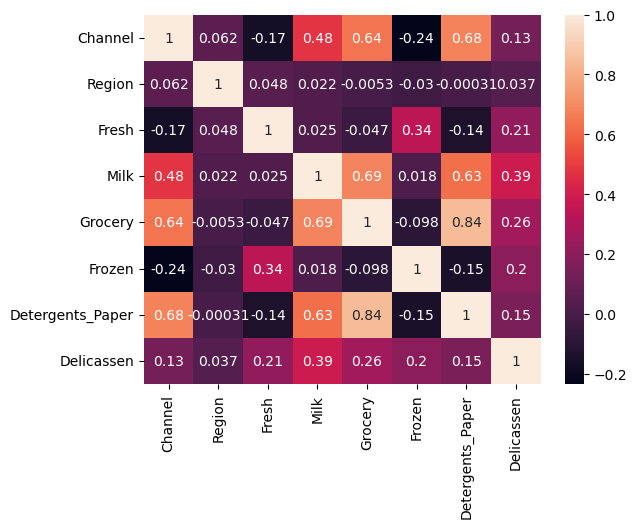

In [35]:
# look at the correlation between variables using heatmap
sns.heatmap(wholesale_data_scaled.corr(), annot = True)

<Axes: xlabel='Grocery', ylabel='Detergents_Paper'>

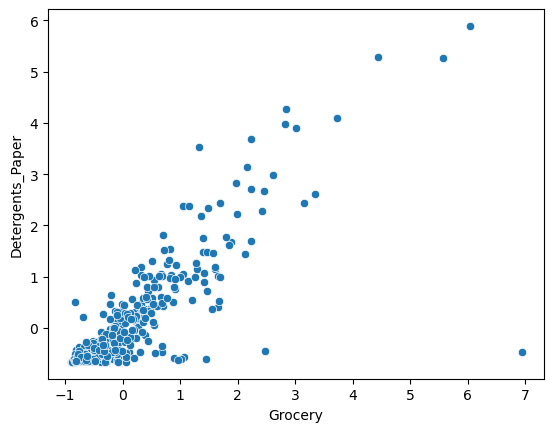

In [36]:
# Grocery and Detergents_Paper seem to have a linear relationship. Look at scatterplot
sns.scatterplot(x= wholesale_data_scaled['Grocery'], y= wholesale_data_scaled['Detergents_Paper'])

The correlation between 'Grocery' and 'Detergents_Paper' is strong with a correlation of 0.84. From the scatterplot we can see that the 2 variables demonstrte a strong positive linear correlation. 

<Axes: xlabel='Fresh', ylabel='Milk'>

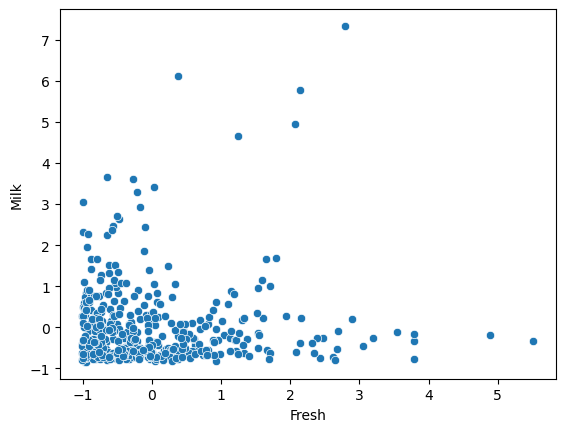

In [37]:
# Look at scatterplot of Fresh and Milk Column
sns.scatterplot(x= wholesale_data_scaled['Fresh'], y= wholesale_data_scaled['Milk'])

There does not seem to be a strong correlation between 'Fresh' and 'Milk'. The correlation coefficient between these 2 variables is weak with a value of 0.025.

In [38]:
# Feature selection using PCA. 
# Chose arbritary PCA number of 6
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca_fit = pca.fit(wholesale_data_scaled)

pca_fit

PCA(n_components=6)

In [39]:
pca.components_ 

array([[ 0.45404032,  0.0198228 , -0.07214363,  0.45584612,  0.51862416,
        -0.10001186,  0.51285576,  0.19611126],
       [-0.16010037,  0.03921512,  0.58324169,  0.2038602 ,  0.03596641,
         0.5792138 , -0.0731487 ,  0.49896619],
       [-0.07556569, -0.97983823, -0.07800077,  0.03105833,  0.05661337,
         0.14325897,  0.04909239, -0.03193519],
       [-0.12329099, -0.04515082, -0.43483209,  0.0804563 , -0.15843279,
        -0.31457346, -0.22246532,  0.78336476],
       [-0.05879014,  0.16910538, -0.67486293,  0.06914097, -0.00219122,
         0.70533647,  0.06000365, -0.0813749 ],
       [-0.71999548,  0.0648424 , -0.02902514,  0.6078037 ,  0.12305155,
        -0.19119117,  0.01862931, -0.23471551]])

# Part II - KMeans Clustering

In [40]:
# import Kmeans from sklearn
from sklearn.cluster import KMeans

# Warnings in this notebook are due to future deprecation of methods
import warnings
warnings.filterwarnings("ignore")

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [41]:
# Number of clusters
k = 6
# Number of training data 
n = wholesale_data_scaled.shape[0]
# Number of features in data
c = wholesale_data_scaled.shape[1]

km = KMeans(n_clusters=6, 
            n_init=10,
            random_state=0)

# fit and predict
y_km = km.fit_predict(wholesale_data_scaled)

In [42]:
# Find number of centroids
mean = np.mean(wholesale_data_scaled, axis = 0)
std = np.std(wholesale_data_scaled, axis = 0)

all_columns_mean = mean.mean()
all_columns_std = std.mean()

centroids = np.random.randn(8,8)*all_columns_std + all_columns_mean
print('Shape of centroids matrix: {0}'.format(centroids.shape))

Shape of centroids matrix: (8, 8)


In [43]:
# Perform Elbow Method
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(wholesale_data_scaled)
    
    ssd.append(model.inertia_) ## SSD (sum of squared distances) Point to cluster centers

In [44]:
# Print sum of squared distances
ssd

[2519.0333795803854,
 2172.109774821485,
 1869.07826436196,
 1612.724374707678,
 1435.7025842892285,
 1309.841327897108,
 1200.104171897745,
 1114.0376125936957]

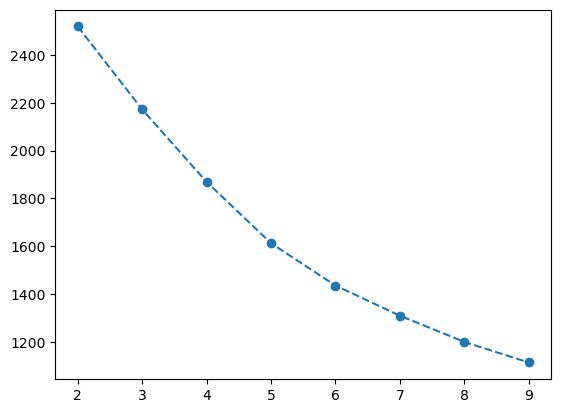

In [46]:
# Plot Elbow plot
plt.plot(range(2,10),ssd,"o--")
plt.title="Elbow Range"
plt.show()

Optimal value for clusters is 6

In [47]:
# Initializing Kmeans and fitting data

kmeans = KMeans(n_clusters = 6, random_state = 111)
y_means = kmeans.fit(wholesale_data_scaled)

In [48]:
#Getting unique labels
label = kmeans.fit_predict(wholesale_data_scaled)
u_labels = np.unique(label)

print(u_labels)

[0 1 2 3 4 5]


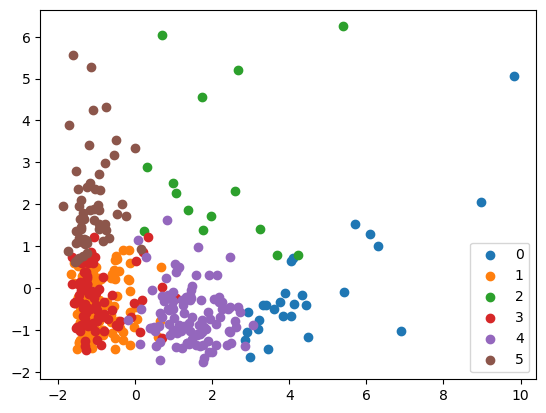

In [49]:
# Fit the data along 6 principal components to view data
dims = PCA(n_components=6).fit_transform(wholesale_data_scaled)
dims = pd.DataFrame(dims,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

fig,ax = plt.subplots(1,1) 
for cluster in u_labels:
    ix = label == cluster
    # Reducing to 2 dimensions to plot on single graph
    ax.scatter(x=dims.loc[ix,'PC1'],y=dims.loc[ix,'PC2'], label=cluster)
ax.legend()

From the k-means clustering figure based on our model, the wholesale data can be categorized into 6 different groups based on the annual spending provided.
- Cluster separation between cluster 1 (orange) and cluster 3 (red) seem to be overlapped. Does not provide clear separation between these two clusters.
- Cluster 2 (green) and cluster 0 (blue) are highly sparsed.
- Overall the k-means clustering provides good separation between all clusters except for cluster 1(orange) and 3(red).

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

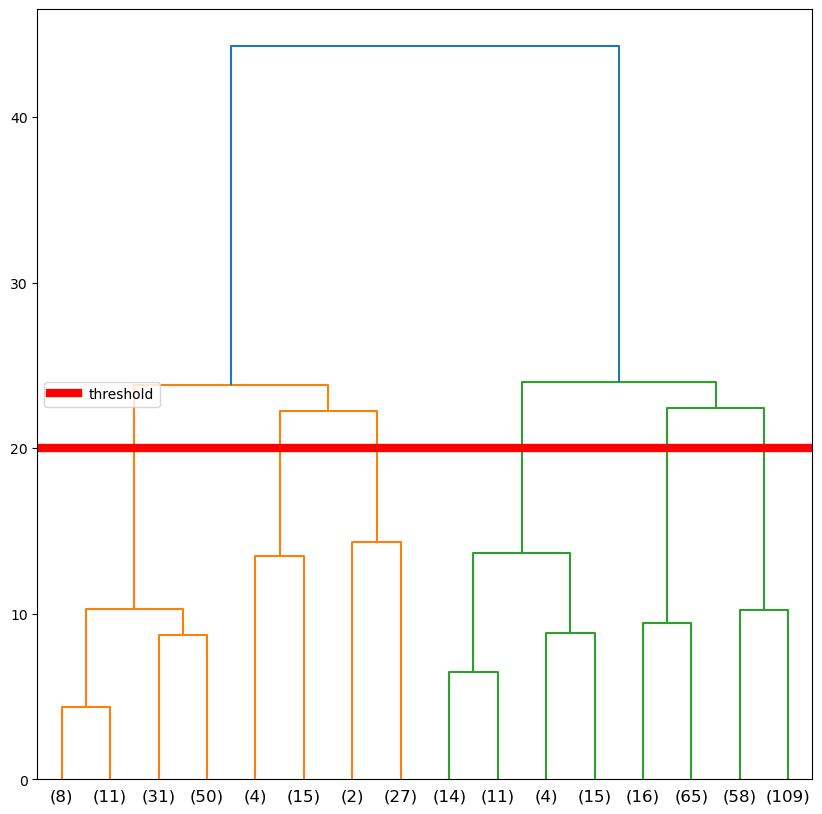

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10,10))
dendrogram(linkage(wholesale_data_scaled ,method='ward'), truncate_mode='level', p=3)
plt.axhline(y=20, label='threshold', color='red', lw=6) # set y for 80% variance
plt.title='Dendrogram'
plt.legend(loc=6)
plt.show()

From the dendogram, the optimal number of clusters is 6.

In [53]:
# Fit Model
from sklearn.cluster import AgglomerativeClustering

hier_model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward', compute_distances=True)
cluster_labels = hier_model.fit_predict(wholesale_data_scaled)
labels = np.unique(cluster_labels)

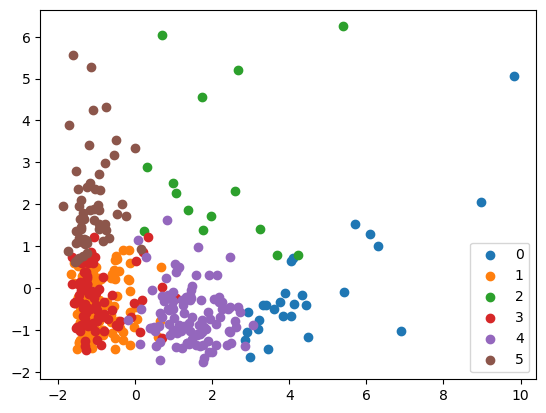

In [54]:
# Fit the data along 6 principal components to view data
dims = PCA(n_components=6).fit_transform(wholesale_data_scaled)
dims = pd.DataFrame(dims,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

fig,ax = plt.subplots(1,1) 
for cluster in labels:
    ix = label == cluster
    # Reducing to 2 dimensions to plot on single graph
    ax.scatter(x=dims.loc[ix,'PC1'],y=dims.loc[ix,'PC2'], label=cluster)
ax.legend()

Hierarchical Method Findings:

- Compared to KMeans clustering there is more distinct clusters seen with hierarchical clustering. 
- Visually, the Hierarchical method appears to separate cluster 3(red), 1(orange), and 5(brown) better compared to the previous KMeans clustering model. 
- Consistent with the KMeans model, Cluster 2 (green) and cluster 0 (blue) remains highly sparsed. 

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

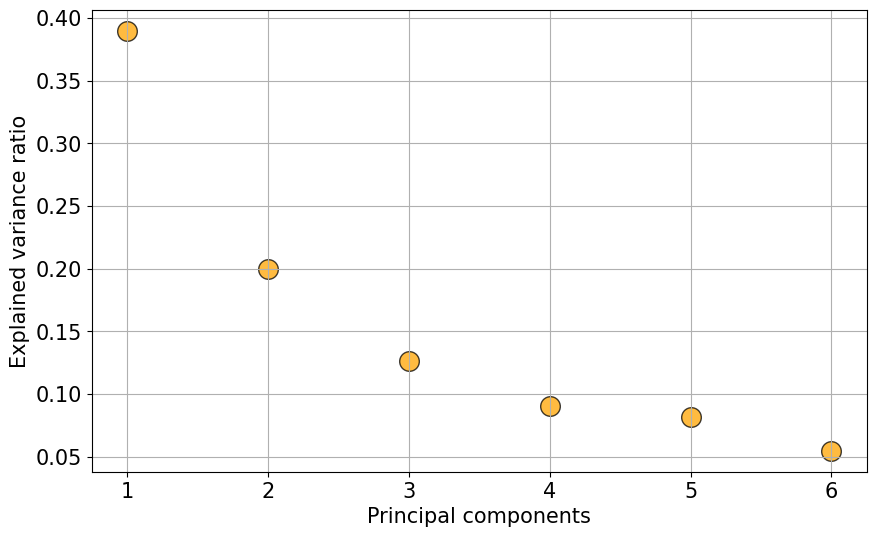

In [61]:
# Plot PCA Explained Variance Raio
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca_fit.explained_variance_ratio_))],
            y=pca_fit.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title = "Explained variance ratio of the \nfitted principal component vector\n"
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca_fit.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()


In [56]:
# Print PCA explained variance ratio
pca.explained_variance_ratio_

array([0.38979637, 0.19935998, 0.12672524, 0.09018591, 0.08172078,
       0.05479061])

PCA Explained Variance Ratio Findings:

- The explained variance says how much variance is attributed to each of the principal components. 
- Through the attribute explained_variance_ratio_, we can see that the first principal component contains 41% of the variance and the second principal component contains 17% of the variance. Together, these two components contain 58% of the variance.

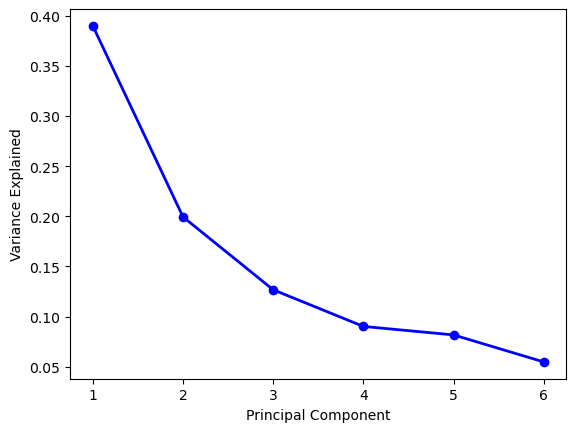

In [63]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title='Scree Plot'
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Previous plot modified to include line.
- Skree Plot suggests that the optimal number of principal components is 4.

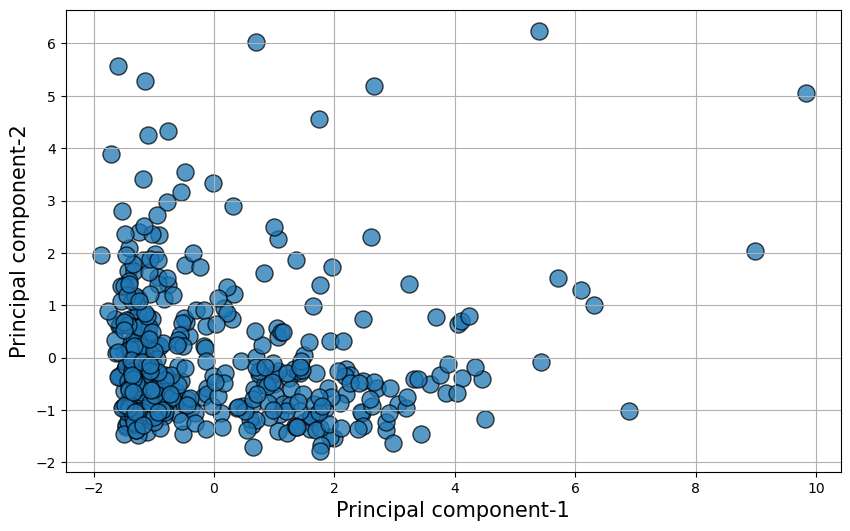

In [58]:
dfx_trans = pca.transform(wholesale_data_scaled)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title = "Class separation using first two principal components"
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

The graph shows the data plotted against principal component 1 and principal component 2. 
K-Nearest Neighbors and Hierarchical Clustering were plotted using these 2 principal components. 

Future considerations for modelling would include reducing the PCA components from 6 (which was used for modelling in this notebook) to the optimal number of components, 4, and repeating the KMeans and Hierarchical Models.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- There is a strong linear correlation between the variables 'Grocery' and 'Detergents_Paper' with a correlation of 0.84. EDA suggests that these variables are positively correlated to each other.  
- The wholesale data can be clustered into 6 distinct groups based on finding the optimal number of clusters k = 6. These clusters can be useful in grouping customer spending data and understanding customer yearly spending.
- Hierachical clustering performed better clustering as 6 distinct clusters can be seen. Conversely, KMeans clustering did not show distinct clusters between cluster 1 (red) and cluster 3 (orange).
- From the attribute explained_variance_ratio_, the first principal component contains 41% of the variance and the second principal component contains 17% of the variance. Together, these two components account for 58% of the variance. The Scree plot suggests that 4 principal components are optimal. 